# Players dataframes with t-1 variables

En este script nos dedicaremos a crear una base de datos limpia segmentada por hitters y pitchers. Debido a que es totalmente análogo al script para variables del mismo periodo $t$, se omitirán solo las explicaciones del código reutilizado.

- **Visualización del contenido de las bases de datos.**
- **Limpieza de la base de datos y exportación.**
- **Creación de indicador de si el jugador es agente libre.**

In [13]:
import pandas as pd
import numpy as np
import math
import os
import warnings
import statsmodels.api as sm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly
from termcolor import colored
print('Modulos importados')

Modulos importados


In [4]:
# Configuraciones
warnings.filterwarnings('ignore')

In [6]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('C:/Users/metal/Documents/Github/MLB_hardball_negotations/')

Directorio de trabajo previo: C:\Users\metal\Documents\Github\MLB_hardball_negotations\Visualizations\Descriptive_statistics\Panel


In [7]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = "C:/Users/metal/Documents/Github/MLB_hardball_negotations"
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

C:\Users\metal\Documents\Github\MLB_hardball_negotations
Nuevo directorio de trabajo: None


## Visualización de las bases de datos

In [8]:
import_path = 'ETL_Data/Panel/General/Teams/teams_panel.csv'

In [11]:
general_panel = pd.read_csv(import_path)
print("Las dimensiones del panel son: " + str(general_panel.shape))
general_panel.head()

Las dimensiones del panel son: (349, 16)


,Acronimo,Equipo,Victorias,Juegos totales,Playoffs,Pennants won,WS ganadas,Anio,Rango,Valor_Corriente,1An_Cambio_Valor%,Valor%,Ingresos_equipo,Ingresos_Operando,Estado,Cantidad de equipos
0,ARI,Arizona Diamondbacks,94,162,5,1,1,2011,20,396.0,4.0,25.0,180,6.2,Arizona,1
1,ATL,Atlanta Braves,89,162,21,18,3,2011,13,482.0,7.0,0.0,201,22.2,Georgia,1
2,BAL,Baltimore Orioles,69,162,11,7,3,2011,18,411.0,9.0,37.0,175,25.5,Maryland,1
3,BOS,Boston Red Sox,90,162,20,12,7,2011,2,912.0,5.0,26.0,272,-1.1,Massachusetts,1
4,CHC,Chicago Cubs,71,162,16,17,2,2011,4,773.0,6.0,75.0,258,23.4,Illinois,2


In [21]:
column_names = ['Victorias', 'Playoffs', 'Pennants won', 'WS ganadas', 
                'Rango', 'Valor_Corriente', '1An_Cambio_Valor%', 'Valor%',
                'Ingresos_Operando']

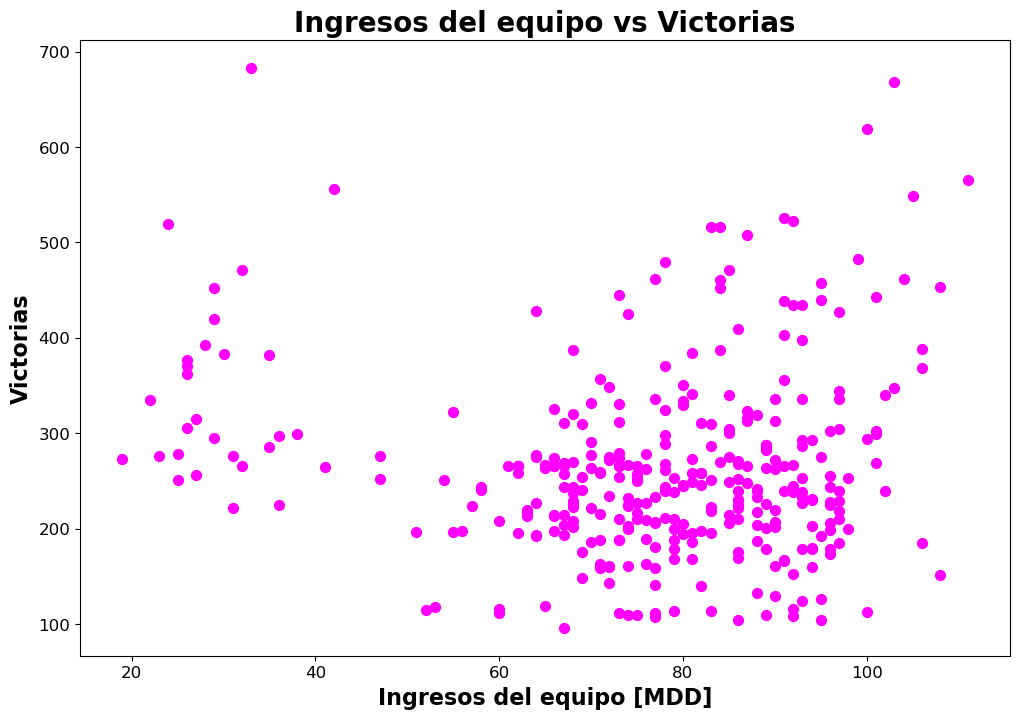

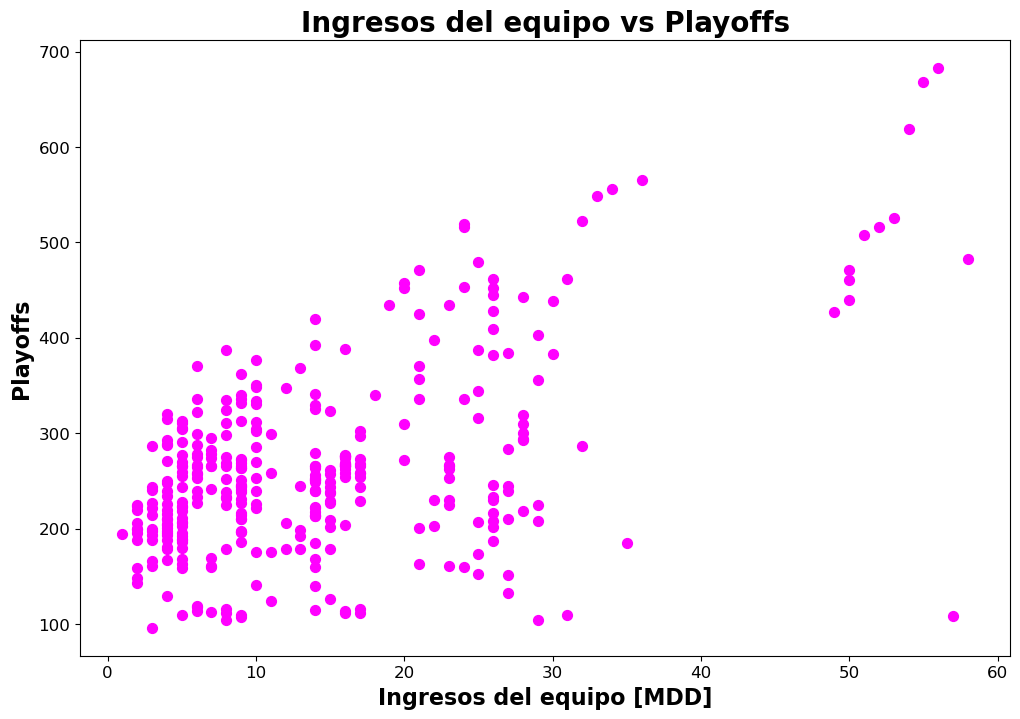

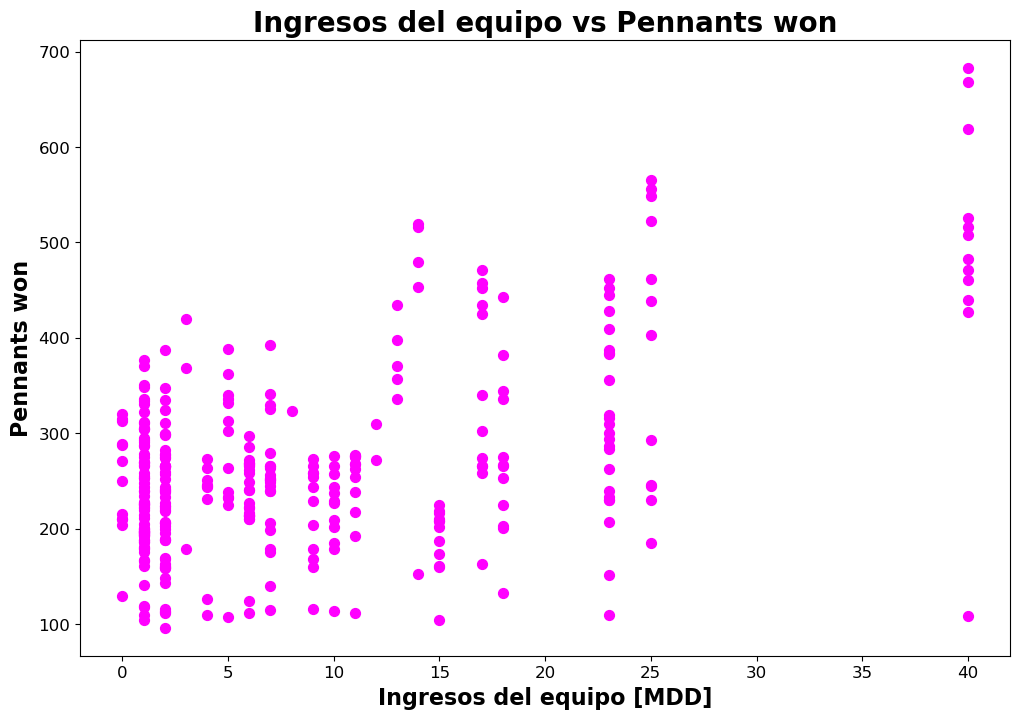

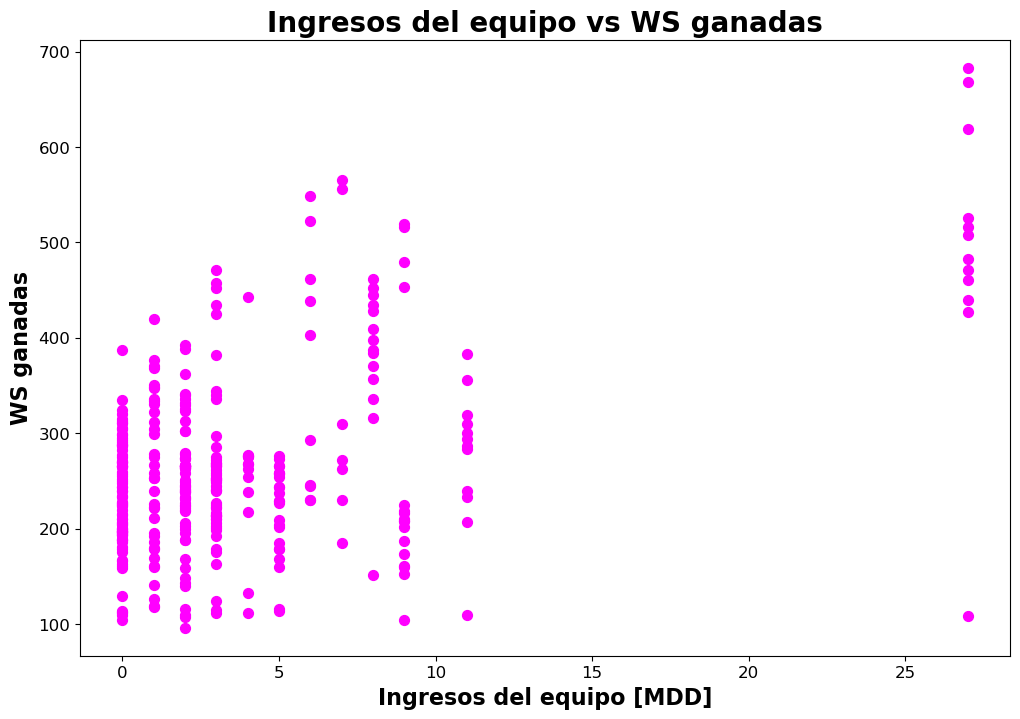

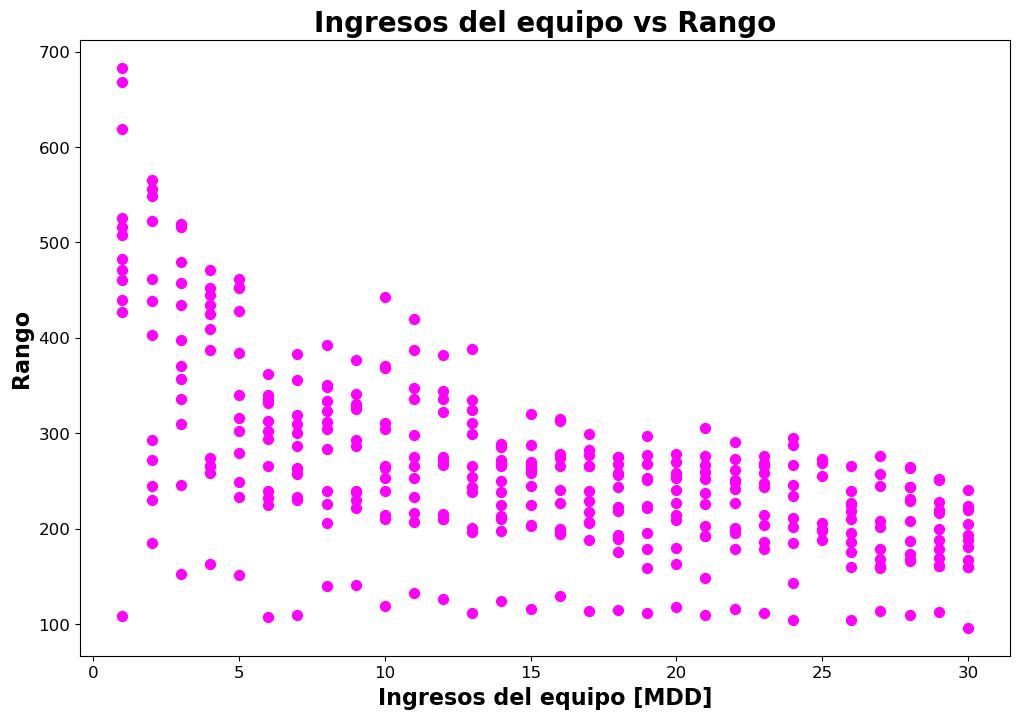

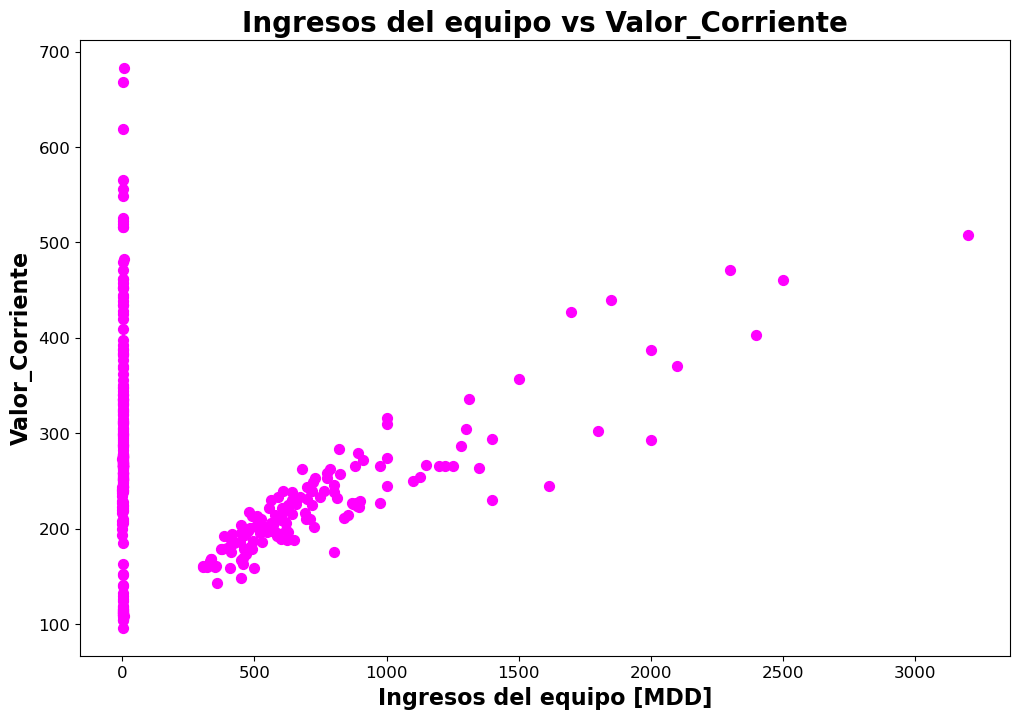

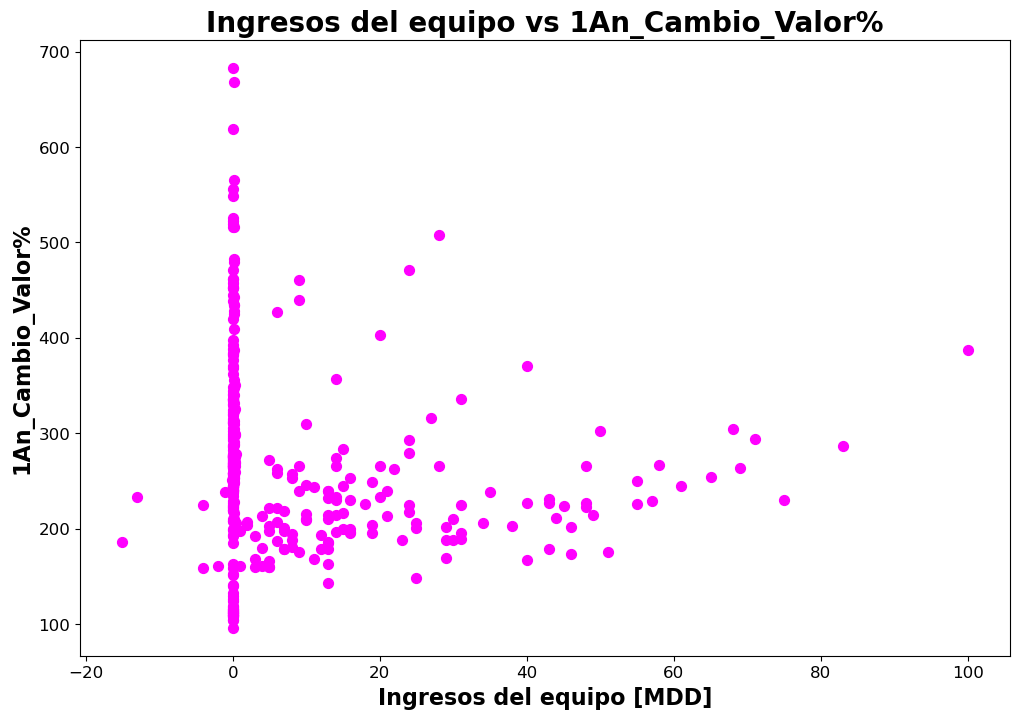

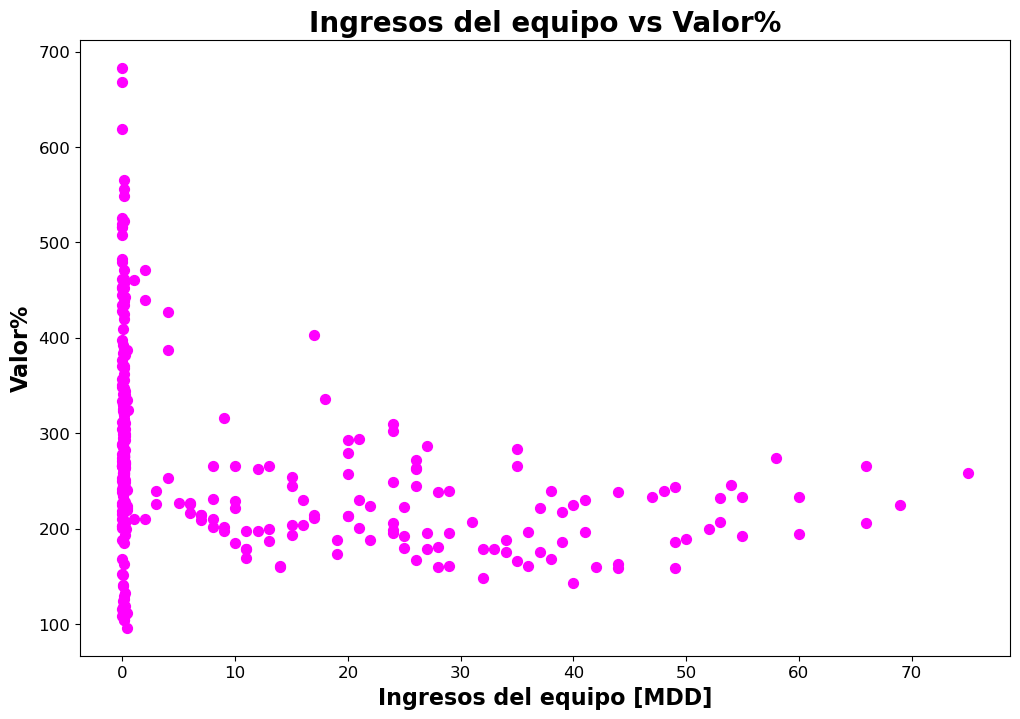

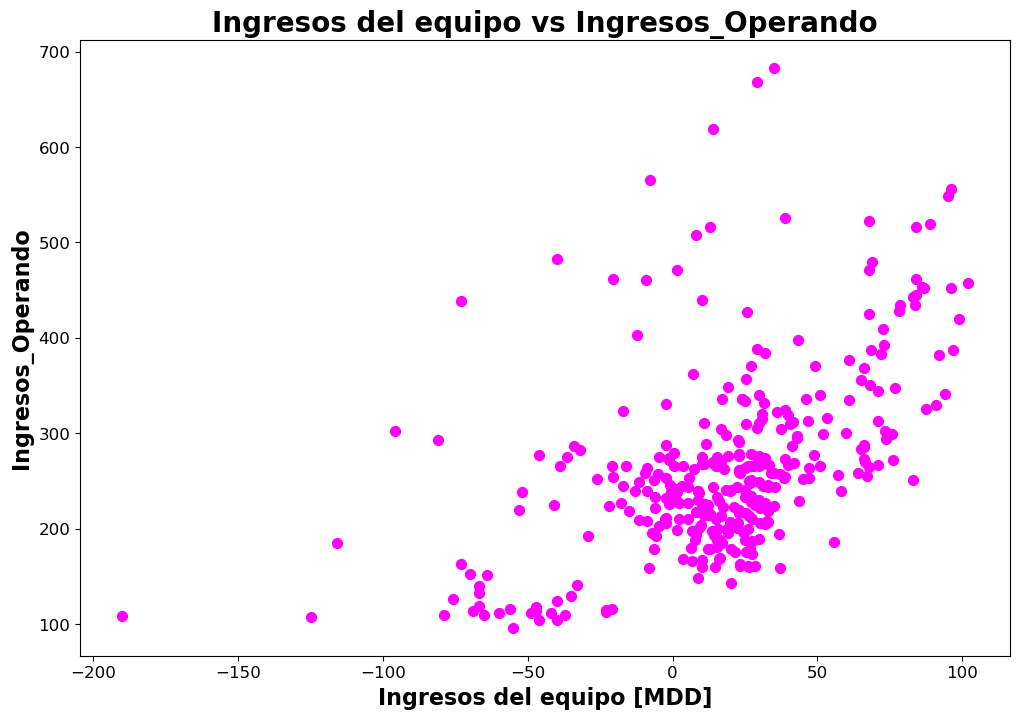

In [23]:
for name in column_names:
    plt.figure(figsize=(12, 8))
    plt.scatter(general_panel[name], general_panel['Ingresos_equipo'], color="magenta", s=50)
    plt.title("Ingresos del equipo vs " + str(name), fontsize=20, fontweight='bold', color='black')
    plt.xlabel('Ingresos del equipo [MDD]', fontsize=16, color='black', fontweight='bold')
    plt.ylabel(name, fontsize=16, color='black', fontweight='bold')
    plt.xticks(fontsize=12, color='black')
    plt.yticks(fontsize=12, color='black')
    plt.grid(False)  # Desactivar la cuadrícula
    #
    plt.show()